In [ ]:
import os

# Lista todos los archivos en /content y los elimina
for f in os.listdir('/content'):
    try:
        os.remove(os.path.join('/content', f))
    except:
        pass

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Computrabajo_Metricas.csv to Computrabajo_Metricas.csv


In [ ]:
import pandas as pd
import csv

archivo = "Computrabajo_Metricas.csv"
df = pd.read_csv(
    archivo,
    encoding='utf-8',
    sep=',',
    quoting=csv.QUOTE_MINIMAL,
    on_bad_lines='skip'
)
df.head()

,Título,Subtítulo,Calificación,Empresa,URL_Empresa,Región,Salario,Contrato,Jornada,Tipo_Asistencia,Descripción,Requerimientos,Acerca_de_Empresa
0,Practicante Preprofesional Ingeniería de Sistemas,NaN,NaN,NaN,https://pe.computrabajo.com/,"Trujillo, La Libertad",NaN,Convenio de Prácticas,Beca/Prácticas,Presencial,Nos encontramos en la búsqueda de un practican...,Educación mínima: Universitario,NaN
1,Técnico en Laboratorio de ingeniería civil,Trujillo,NaN,NaN,https://pe.computrabajo.com/,"Trujillo, La Libertad",NaN,Contrato por Inicio o Incremento de Actividad,Tiempo completo,Remoto,Nos encontramos en la búsqueda de dos Técnicos...,Educación mínima: Técnico\n2 años de experienc...,NaN
2,Practicante Profesional de Ingeniería Industri...,(Trujillo),"4,3",Danper Trujillo SAC,https://pe.computrabajo.com/danper,"Trujillo, La Libertad",NaN,Contrato por Inicio o Incremento de Actividad,Tiempo completo,Remoto,Importante empresa agroindustrial líder a nive...,Educación mínima: Universitario\nMenos de 1 añ...,Somos una Joint Venture de capitales peruanos ...
3,Practicante Profesional de Ingeniería Ambienta...,Trujillo (REF 76083),"4,3",Manpower,https://pe.computrabajo.com/manpower,"Trujillo, La Libertad","S/. 1.250,00 (Mensual)",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Remoto,"Por encargo de nuestro cliente, Promigas Perú ...",Educación mínima: Universitario,"Con oficinas en 80 países en todo el mundo, Ma..."
4,Practicante de Ingeniería Civil Arquitectura,NaN,NaN,INMOBILIARIA CBR CONSTRUCTORES S.A.C,https://pe.computrabajo.com/inmobiliaria-cbr-c...,"Trujillo, La Libertad",NaN,Convenio de Prácticas,Beca/Prácticas,Remoto,PRACTICANTE PRE PROFESIONAL DE INGENIERIA CIVI...,Educación mínima: Universitario\nEdad: A parti...,NaN


# **EXPLORACIÓN DEL DATASET**

**Conteo de columnas, filas y celdas (datos)**

In [ ]:
num_columnas = df.shape[1]
num_filas = df.shape[0]
num_datos = df.size

print(f"Total de columnas: {num_columnas}")
print(f"Total de filas: {num_filas}")
print(f"Total de datos (celdas): {num_datos}")

Total de columnas: 13
Total de filas: 1072
Total de datos (celdas): 13936


**Visualización de Cantidad Nulos**

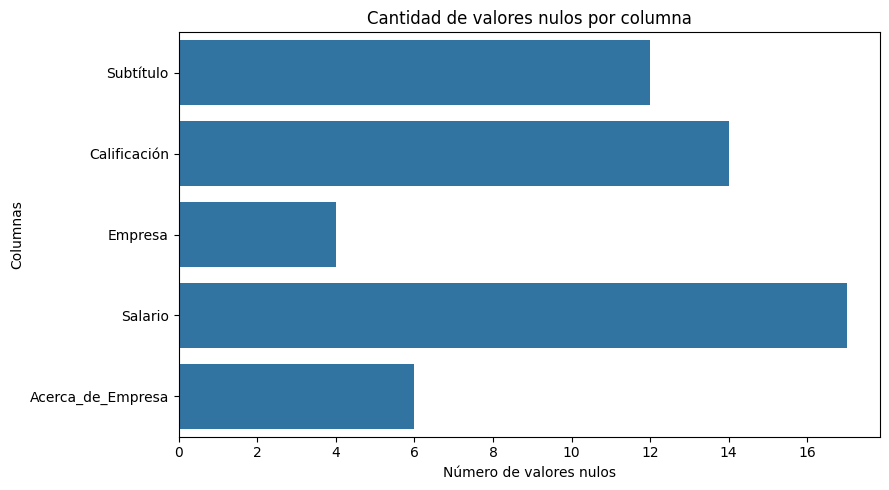

In [ ]:
null_counts = df.isna().sum()
null_counts = null_counts[null_counts > 0]  # Mostrar solo columnas con nulos

# Grafica
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.barplot(x=null_counts.values, y=null_counts.index)
plt.title("Cantidad de valores nulos por columna")
plt.xlabel("Número de valores nulos")
plt.ylabel("Columnas")
plt.tight_layout()
plt.show()

**Cantidad total de nulos**

In [ ]:
total_nulos = df.isnull().sum().sum()
print(f"Cantidad total de valores nulos: {total_nulos}")

Cantidad total de valores nulos: 53


**Estadísticas resumidas de todas las columnas numéricas y categóricas**

In [ ]:
df.describe(include='all')

,Título,Subtítulo,Calificación,Empresa,URL_Empresa,Región,Salario,Contrato,Jornada,Tipo_Asistencia,Descripción,Requerimientos,Acerca_de_Empresa
count,1072,1060,1058,1068,1072,1072,1055,1072,1072,1072,1072,1072,1066
unique,22,9,3,13,14,1,5,5,2,2,25,18,11
top,Ingeniero de Ingeniería y Ofertas.,Agrónomo,"4,1",Vector Software Factory Sucursal Perú,https://pe.computrabajo.com/empresas/ofertas-d...,"Trujillo, La Libertad","S/. 1.300,00 (Mensual)",Contrato por Inicio o Incremento de Actividad,Tiempo completo,Presencial,Desarrollar labores de campo.\nVelar por la si...,Educación mínima: Universitario\n3 años de exp...,Operador logístico. Reparto y distribución de ...
freq,64,149,369,98,84,1072,222,224,556,808,60,73,111


**Agrupamiento y conteo por Tipo de Jornada**

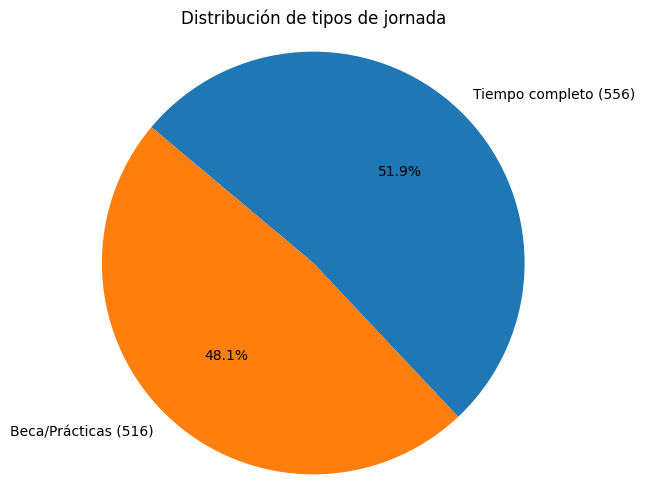

In [ ]:
jornada_counts = df['Jornada'].value_counts()

# Crear gráfico
plt.figure(figsize=(6, 6))
plt.pie(jornada_counts,
        labels=[f"{label} ({count})" for label, count in zip(jornada_counts.index, jornada_counts.values)],
        autopct='%1.1f%%', startangle=140, counterclock=False)

plt.title("Distribución de tipos de jornada")
plt.axis('equal')  # Para que el pastel sea circular
plt.show()

**Agrupamiento y conteo por Tipo de Asistencia**

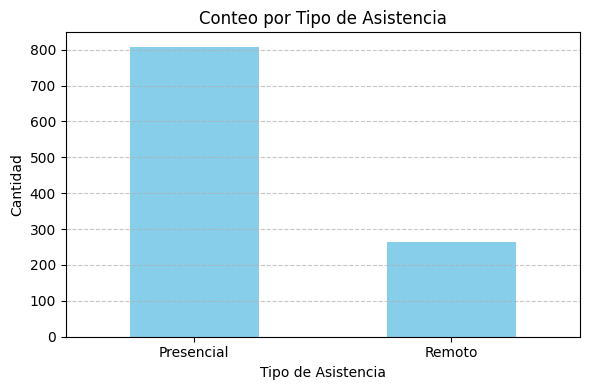

In [ ]:
# Limpiar espacios en blanco en 'Tipo_Asistencia'
df['Tipo_Asistencia'] = df['Tipo_Asistencia'].astype(str).str.strip()

# Contar valores únicos
conteo_asistencia = df['Tipo_Asistencia'].value_counts()

# Graficar
plt.figure(figsize=(6, 4))
conteo_asistencia.plot(kind='bar', color='skyblue')
plt.title('Conteo por Tipo de Asistencia')
plt.xlabel('Tipo de Asistencia')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**TA-001 – Calcular el porcentaje de Registros Incompletos**

In [ ]:
# Total de celdas y total de celdas vacías
total_celdas = df.size
celdas_nulas = df.isnull().sum().sum()

# Porcentaje
porcentaje_incompletos = (celdas_nulas / total_celdas) * 100
print(f"Porcentaje de registros incompletos: {porcentaje_incompletos:.2f}%")

Porcentaje de registros incompletos: 0.38%


**TA-002 – Cantidad de Registros Duplicados**

In [ ]:
duplicados = df.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicados}")

Cantidad de registros duplicados: 0


**TA-005 – Salarios Indefinidos**

In [ ]:
total_filas = len(df)
valores_nulos = df['Salario'].isna().sum()

porcentaje_vacios = (valores_nulos / total_filas) * 100

print(f"Porcentaje de valores vacíos en 'Salario': {porcentaje_vacios:.2f}%")

Porcentaje de valores vacíos en 'Salario': 1.59%


**Verificacion de tipos de datos**

In [ ]:
tipos_unicos = df.dtypes.unique()
print("Tipo de datos:")
for tipo in tipos_unicos:
    print(f"- {tipo}")

Tipo de datos:
- object


# **PREPROCESAMIENTO**

**TA-004 – Columna Salario Parseada Exitosamente**

In [ ]:
# Eliminar texto como "(Mensual)" u otros entre paréntesis
df['Salario'] = df['Salario'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

# Separar en símbolo y cantidad
df[['Salario_Simbolo', 'Salario_Valor']] = df['Salario'].str.extract(r'(\D+)?([\d.,]+)')

# Mostrar resultado
print(df[['Salario_Simbolo', 'Salario_Valor']])

     Salario_Simbolo Salario_Valor
0                NaN           NaN
1                NaN           NaN
2                NaN           NaN
3               S/.       1.250,00
4                NaN           NaN
...              ...           ...
1067            S/.       3.000,00
1068            S/.       3.000,00
1069            S/.       1.300,00
1070            S/.       2.500,00
1071            S/.       1.590,00

[1072 rows x 2 columns]


In [ ]:
# Limpiar y convertir la columna 'Salario_Valor' a float
df['Salario_Valor'] = df['Salario_Valor']\
    .str.replace('.', '', regex=False)\
    .str.replace(',', '.', regex=False)

df['Salario_Valor'] = pd.to_numeric(df['Salario_Valor'], errors='coerce')

# Calcular cuántos valores fueron convertidos correctamente (no NaN)
total = len(df)
convertidos = df['Salario_Valor'].notna().sum()

# Porcentaje
porcentaje_convertidos = (convertidos / total) * 100

# Mostrar resultado
print(f"Porcentaje de salarios convertidos correctamente a numérico: {porcentaje_convertidos:.2f}%")

Porcentaje de salarios convertidos correctamente a numérico: 98.41%


In [ ]:
# Eliminar la columna 'Salario_Simbolo'
df.drop(columns='Salario_Simbolo', inplace=True)

# Eliminar la columna 'Salario'
df.drop(columns='Salario', inplace=True)

# Renombrar 'Salario_Valor' a 'Salario'
df.rename(columns={'Salario_Valor': 'Salario'}, inplace=True)
print(df[['Salario']])

      Salario
0         NaN
1         NaN
2         NaN
3      1250.0
4         NaN
...       ...
1067   3000.0
1068   3000.0
1069   1300.0
1070   2500.0
1071   1590.0

[1072 rows x 1 columns]


**Normalizacion de la columna Salario**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Aplicar normalización Min-Max a Salario
scaler = MinMaxScaler()
df['Salario'] = scaler.fit_transform(df[['Salario']])

# Verificar de nuevo el rango
print(f"Salario normalizado. Nuevo rango: {df['Salario'].min()} a {df['Salario'].max()}")

Salario normalizado. Nuevo rango: 0.0 a 1.0


**TA-012 - Inserción de Habilidades Técnicas y Blandas como Variables**

In [ ]:
# Asegurar minúsculas para el filtrado
df['Título'] = df['Título'].astype(str).str.lower()
df['Descripcion'] = df['Descripción'].astype(str).str.lower()

# Palabras clave relacionadas con ingeniería
keywords_engineering = [
    'ingeniería', 'ingeniero', 'industrial', 'sistemas', 'software',
    'civil', 'ambiental', 'electrónica', 'eléctrica', 'mecánica',
    'computación', 'informática', 'minas', 'telecomunicaciones'
]
# Función para verificar presencia de palabras clave
def contiene_palabra_ingenieria(texto):
    return any(palabra in texto for palabra in keywords_engineering)

# Filtro aplicado a ambas columnas
filtro = df['Título'].apply(contiene_palabra_ingenieria) | df['Descripción'].apply(contiene_palabra_ingenieria)

# Aplicar el filtro
df = df[filtro]

# Verificar resultado
df.reset_index(drop=True, inplace=True)
print(f" Ofertas relacionadas con ingeniería: {len(df)}")
df

 Ofertas relacionadas con ingeniería: 1072


,Título,Subtítulo,Calificación,Empresa,URL_Empresa,Región,Contrato,Jornada,Tipo_Asistencia,Descripción,Requerimientos,Acerca_de_Empresa,Salario,Descripcion
0,practicante preprofesional ingeniería de sistemas,NaN,NaN,NaN,https://pe.computrabajo.com/,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Presencial,Nos encontramos en la búsqueda de un practican...,Educación mínima: Universitario,NaN,NaN,nos encontramos en la búsqueda de un practican...
1,técnico en laboratorio de ingeniería civil,Trujillo,NaN,NaN,https://pe.computrabajo.com/,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Tiempo completo,Remoto,Nos encontramos en la búsqueda de dos Técnicos...,Educación mínima: Técnico\n2 años de experienc...,NaN,NaN,nos encontramos en la búsqueda de dos técnicos...
2,practicante profesional de ingeniería industri...,(Trujillo),"4,3",Danper Trujillo SAC,https://pe.computrabajo.com/danper,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Tiempo completo,Remoto,Importante empresa agroindustrial líder a nive...,Educación mínima: Universitario\nMenos de 1 añ...,Somos una Joint Venture de capitales peruanos ...,NaN,importante empresa agroindustrial líder a nive...
3,practicante profesional de ingeniería ambienta...,Trujillo (REF 76083),"4,3",Manpower,https://pe.computrabajo.com/manpower,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Remoto,"Por encargo de nuestro cliente, Promigas Perú ...",Educación mínima: Universitario,"Con oficinas en 80 países en todo el mundo, Ma...",0.000000,"por encargo de nuestro cliente, promigas perú ..."
4,practicante de ingeniería civil arquitectura,NaN,NaN,INMOBILIARIA CBR CONSTRUCTORES S.A.C,https://pe.computrabajo.com/inmobiliaria-cbr-c...,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Remoto,PRACTICANTE PRE PROFESIONAL DE INGENIERIA CIVI...,Educación mínima: Universitario\nEdad: A parti...,NaN,NaN,practicante pre profesional de ingenieria civi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,practicante profesional de ingeniería industri...,Agrónomo,"1,9",MAGSA EIRL,https://pe.computrabajo.com/magsa-eirl,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Presencial,Importante puesto de Ingeniero de calidad para...,Educación mínima: Universitario\n5 años de exp...,"Con oficinas en 80 países en todo el mundo, Ma...",1.000000,importante puesto de ingeniero de calidad para...
1068,ingeniero(a) de proyectos y desarrollo técnico...,Trujillo (REF. 75662),"4,3",Bitel,https://pe.computrabajo.com/inmobiliaria-cbr-c...,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Presencial,PRACTICANTE PRE PROFESIONAL DE INGENIERIA CIVI...,Educación mínima: Universitario\n5 años de exp...,Empresa dedicada a la prestación de servicios ...,1.000000,practicante pre profesional de ingenieria civi...
1069,ingeniero de seguridad y salud ocupacional,Trujillo (REF. 75662),"4,3",BairesDev LLC,https://pe.computrabajo.com/danper,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Presencial,Importante empresa busca un supervisor de obra...,Educación mínima: Universitario\n5 años de exp...,Servicios de ingeniería y capacitación en auto...,0.028571,importante empresa busca un supervisor de obra...
1070,practicante preprofesional ingeniería de sistemas,con experiencia,"4,1",Copper Cave,https://pe.computrabajo.com/bairesdev,"Trujillo, La Libertad",Convenio de Prácticas,Tiempo completo,Presencial,En BairesDev® llevamos 15 años liderando proye...,Educación mínima: Universitario\n2 años de exp...,Empresa dedicada a la prestación de servicios ...,0.714286,en bairesdev® llevamos 15 años liderando proye...


**AGREGAR COLUMNAS DE SOFT AND HARD SKILLS**

In [ ]:
import re
# Limpieza inicial de texto
df['Descripción'] = df['Descripción'].astype(str).str.lower().str.replace(r'[\r\n]+', ' ', regex=True)
df['Requerimientos'] = df['Requerimientos'].astype(str).str.lower().str.replace(r'[\r\n]+', ' ', regex=True)

# Unificar campos para analizar habilidades
df['texto_skills'] = df['Descripción'] + " " + df['Requerimientos']

# Listas de habilidades técnicas (hard) y blandas (soft)
hard_skills = [
    'python', 'java', 'sql', '.net', 'javascript', 'html', 'css', 'django', 'flask', 'react', 'angular', 'node', 'power bi', 'sap', 'aws', 'azure', 'git',
    'github', 'ci/cd', 'linux', 'docker', 'kubernetes', 'etl', 'big data', 'data lake', 'postgresql', 'mysql', 'nosql', 'mongodb', 'cloud', 'bash', 'jira',
    'excel', 'autocad', 'r', 'office', 'google workspace', 'matlab', 'project', 'solidworks', 'datos', 'seguridad', 'desarrollo', 'gestión', 'procesos'
]

soft_skills = [
    'comunicación', 'trabajo en equipo', 'proactividad', 'compromiso', 'adaptabilidad', 'liderazgo', 'responsabilidad', 'creatividad', 'resolución de problemas', 'orientación al cliente', 'pensamiento crítico'
]

# Crear columnas para cada hard skill
for skill in hard_skills:
    col_name = f"hard_{skill.replace('/', '_').replace(' ', '_')}"
    df[col_name] = df['texto_skills'].str.contains(rf'\b{re.escape(skill)}\b', regex=True)

# Crear columnas para cada soft skill
for skill in soft_skills:
    col_name = f"soft_{skill.replace(' ', '_')}"
    df[col_name] = df['texto_skills'].str.contains(rf'\b{re.escape(skill)}\b', regex=True)

# Mostrar una vista previa de las nuevas columnas creadas
columnas_skills = [col for col in df.columns if col.startswith('soft_') or col.startswith('hard_')]
df[columnas_skills]

,hard_python,hard_java,hard_sql,hard_.net,hard_javascript,hard_html,hard_css,hard_django,hard_flask,hard_react,...,soft_trabajo_en_equipo,soft_proactividad,soft_compromiso,soft_adaptabilidad,soft_liderazgo,soft_responsabilidad,soft_creatividad,soft_resolución_de_problemas,soft_orientación_al_cliente,soft_pensamiento_crítico
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1068,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1069,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1070,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df

,Título,Subtítulo,Calificación,Empresa,URL_Empresa,Región,Contrato,Jornada,Tipo_Asistencia,Descripción,...,soft_trabajo_en_equipo,soft_proactividad,soft_compromiso,soft_adaptabilidad,soft_liderazgo,soft_responsabilidad,soft_creatividad,soft_resolución_de_problemas,soft_orientación_al_cliente,soft_pensamiento_crítico
0,practicante preprofesional ingeniería de sistemas,NaN,NaN,NaN,https://pe.computrabajo.com/,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Presencial,nos encontramos en la búsqueda de un practican...,...,False,False,False,False,False,False,False,False,False,False
1,técnico en laboratorio de ingeniería civil,Trujillo,NaN,NaN,https://pe.computrabajo.com/,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Tiempo completo,Remoto,nos encontramos en la búsqueda de dos técnicos...,...,False,False,False,False,False,False,False,False,False,False
2,practicante profesional de ingeniería industri...,(Trujillo),"4,3",Danper Trujillo SAC,https://pe.computrabajo.com/danper,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Tiempo completo,Remoto,importante empresa agroindustrial líder a nive...,...,True,False,False,False,True,False,False,False,False,False
3,practicante profesional de ingeniería ambienta...,Trujillo (REF 76083),"4,3",Manpower,https://pe.computrabajo.com/manpower,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Remoto,"por encargo de nuestro cliente, promigas perú ...",...,False,False,False,False,False,False,False,False,False,False
4,practicante de ingeniería civil arquitectura,NaN,NaN,INMOBILIARIA CBR CONSTRUCTORES S.A.C,https://pe.computrabajo.com/inmobiliaria-cbr-c...,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Remoto,practicante pre profesional de ingenieria civi...,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,practicante profesional de ingeniería industri...,Agrónomo,"1,9",MAGSA EIRL,https://pe.computrabajo.com/magsa-eirl,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Presencial,importante puesto de ingeniero de calidad para...,...,False,False,False,False,False,False,False,False,False,False
1068,ingeniero(a) de proyectos y desarrollo técnico...,Trujillo (REF. 75662),"4,3",Bitel,https://pe.computrabajo.com/inmobiliaria-cbr-c...,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Presencial,practicante pre profesional de ingenieria civi...,...,False,False,False,False,False,False,False,False,False,False
1069,ingeniero de seguridad y salud ocupacional,Trujillo (REF. 75662),"4,3",BairesDev LLC,https://pe.computrabajo.com/danper,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Presencial,importante empresa busca un supervisor de obra...,...,False,False,False,False,False,False,False,False,False,False
1070,practicante preprofesional ingeniería de sistemas,con experiencia,"4,1",Copper Cave,https://pe.computrabajo.com/bairesdev,"Trujillo, La Libertad",Convenio de Prácticas,Tiempo completo,Presencial,en bairesdev® llevamos 15 años liderando proye...,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Paso 1: Preparar texto
df['Título'] = df['Título'].astype(str).str.lower()
df['Descripción'] = df['Descripción'].astype(str).str.lower().str.replace(r'[\r\n]+', ' ', regex=True)
df['Requerimientos'] = df['Requerimientos'].astype(str).str.lower().str.replace(r'[\r\n]+', ' ', regex=True)

# Paso 2: Definir keywords por carrera
carrera_keywords = {
    'Ingeniería de Sistemas': ['ingeniería de sistemas', 'ingeniero de sistemas', 'python', 'java', 'sql', 'software', 'desarrollo web', 'backend', 'frontend', 'node', 'react', 'angular', 'etl', 'power bi', 'sap', 'cloud', 'aws', 'azure'],
    'Ingeniería Civil': ['ingeniería civil', 'ingeniero civil', 'autocad', 'obra', 'planos', 'civil 3d'],
    'Ingeniería Industrial': ['ingeniería industrial', 'ingeniero industrial', 'lean', 'kaizen', 'six sigma', 'procesos', 'gestión de calidad'],
    'Ingeniería Electrónica': ['ingeniería electrónica', 'ingeniero electrónico', 'circuitos', 'arduino', 'microcontroladores', 'fpga'],
    'Ingeniería Mecánica': ['ingeniería mecánica', 'ingeniero mecánico', 'solidworks', 'catia', 'inventor', 'mecánica', 'mecanizado', 'termodinamica'],
    'Ingeniería Ambiental': ['ingeniería ambiental', 'ingeniero ambiental', 'residuos', 'impacto ambiental', 'sostenibilidad'],
    'Ingeniería de Minas': ['ingeniería de minas', 'ingeniero de minas', 'minería', 'voladura', 'geomecánica'],
    'Ingeniería Eléctrica': ['ingeniería eléctrica', 'ingeniero eléctrico', 'alta tensión', 'baja tensión', 'subestaciones']
}

# Paso 3: Asignar carrera detectada (mejorado para usar campos separados)
def detectar_carrera_por_campos(titulo, descripcion, requerimientos):
    texto_total = f"{titulo} {descripcion} {requerimientos}"
    for carrera, keywords in carrera_keywords.items():
        if any(kw in texto_total for kw in keywords):
            return carrera
    return 'No clasificado'

# Aplicar función con acceso separado a columnas
df['Carrera Detectada'] = df.apply(lambda row: detectar_carrera_por_campos(row['Título'], row['Descripción'], row['Requerimientos']), axis=1)

# Paso 4: Mostrar resultados
conteo_resultado = df['Carrera Detectada'].value_counts()
print("Carreras detectadas en el dataset:")
print(conteo_resultado)


Carreras detectadas en el dataset:
Carrera Detectada
Ingeniería de Sistemas    699
Ingeniería Civil          205
Ingeniería Industrial      89
No clasificado             43
Ingeniería de Minas        19
Ingeniería Mecánica         7
Ingeniería Ambiental        5
Ingeniería Electrónica      5
Name: count, dtype: int64


In [ ]:
# Filtrar las filas que no fueron clasificadas
df_no_clasificadas = df[df['Carrera Detectada'] == 'No clasificado']

# Ver cuántas hay
print(f"Total de filas no clasificadas: {len(df_no_clasificadas)}")

# Mostrar columnas clave para revisar
df_no_clasificadas[['Título', 'Descripción', 'Requerimientos']]

Total de filas no clasificadas: 43


,Título,Descripción,Requerimientos
18,ingeniero agrónomo,desarrollar labores de campo. velar por la sie...,educación mínima: universitario 3 años de expe...
29,trabajo desde casa ingeniero de datos / ref. 0339,desarrollar labores de campo. velar por la sie...,educación mínima: universitario 3 años de expe...
51,ingeniero de proyectos domóticos,nos encontramos en la búsqueda de un practican...,educación mínima: universitario 5 años de expe...
105,trabajo desde casa ingeniero de automatización...,desarrollar labores de campo. velar por la sie...,educación mínima: universitario 3 años de expe...
107,ingeniero de ingeniería y ofertas.,desarrollar labores de campo. velar por la sie...,educación mínima: universitario 1 año de exper...
125,ingeniero(a) de proyectos y desarrollo técnico...,desarrollar labores de campo. velar por la sie...,educación mínima: universitario menos de 1 año...
154,ingeniero(a) de proyectos y desarrollo técnico...,desarrollar labores de campo. velar por la sie...,educación mínima: universitario 3 años de expe...
167,ingeniero de proyectos domóticos,nos encontramos en la búsqueda de un practican...,educación mínima: universitario 3 años de expe...
211,trabajo desde casa ingeniero de datos / ref. 0339,nos encontramos en la búsqueda de un practican...,educación mínima: universitario 2 años de expe...
220,ingeniero sistemas,desarrollar labores de campo. velar por la sie...,educación mínima: técnico


In [ ]:
# Eliminar las filas donde no se detectó ninguna carrera de ingeniería
df = df[df['Carrera Detectada'] != 'No clasificado'].copy()

# Reiniciar el índice por limpieza
df.reset_index(drop=True, inplace=True)

# Confirmar cantidad de filas finales
print(f"Dataset actualizado. Total de filas relacionadas con ingenierías: {len(df)}")

Dataset actualizado. Total de filas relacionadas con ingenierías: 1029


In [ ]:
# Filtrar las filas que no fueron clasificadas
df_no_clasificadas = df[df['Carrera Detectada'] == 'No clasificado']

# Ver cuántas hay
print(f"Total de filas no clasificadas: {len(df_no_clasificadas)}")

# Mostrar columnas clave para revisar
df_no_clasificadas[['Título', 'Descripción', 'Requerimientos']]

Total de filas no clasificadas: 0


,Título,Descripción,Requerimientos


In [ ]:
df

,Título,Subtítulo,Calificación,Empresa,URL_Empresa,Región,Contrato,Jornada,Tipo_Asistencia,Descripción,...,soft_proactividad,soft_compromiso,soft_adaptabilidad,soft_liderazgo,soft_responsabilidad,soft_creatividad,soft_resolución_de_problemas,soft_orientación_al_cliente,soft_pensamiento_crítico,Carrera Detectada
0,practicante preprofesional ingeniería de sistemas,NaN,NaN,NaN,https://pe.computrabajo.com/,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Presencial,nos encontramos en la búsqueda de un practican...,...,False,False,False,False,False,False,False,False,False,Ingeniería de Sistemas
1,técnico en laboratorio de ingeniería civil,Trujillo,NaN,NaN,https://pe.computrabajo.com/,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Tiempo completo,Remoto,nos encontramos en la búsqueda de dos técnicos...,...,False,False,False,False,False,False,False,False,False,Ingeniería Civil
2,practicante profesional de ingeniería industri...,(Trujillo),"4,3",Danper Trujillo SAC,https://pe.computrabajo.com/danper,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Tiempo completo,Remoto,importante empresa agroindustrial líder a nive...,...,False,False,False,True,False,False,False,False,False,Ingeniería de Sistemas
3,practicante profesional de ingeniería ambienta...,Trujillo (REF 76083),"4,3",Manpower,https://pe.computrabajo.com/manpower,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Remoto,"por encargo de nuestro cliente, promigas perú ...",...,False,False,False,False,False,False,False,False,False,Ingeniería de Sistemas
4,practicante de ingeniería civil arquitectura,NaN,NaN,INMOBILIARIA CBR CONSTRUCTORES S.A.C,https://pe.computrabajo.com/inmobiliaria-cbr-c...,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Remoto,practicante pre profesional de ingenieria civi...,...,False,False,False,False,False,False,False,False,False,Ingeniería Civil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,practicante profesional de ingeniería industri...,Agrónomo,"1,9",MAGSA EIRL,https://pe.computrabajo.com/magsa-eirl,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Presencial,importante puesto de ingeniero de calidad para...,...,False,False,False,False,False,False,False,False,False,Ingeniería de Sistemas
1025,ingeniero(a) de proyectos y desarrollo técnico...,Trujillo (REF. 75662),"4,3",Bitel,https://pe.computrabajo.com/inmobiliaria-cbr-c...,"Trujillo, La Libertad",Convenio de Prácticas,Beca/Prácticas,Presencial,practicante pre profesional de ingenieria civi...,...,False,False,False,False,False,False,False,False,False,Ingeniería de Sistemas
1026,ingeniero de seguridad y salud ocupacional,Trujillo (REF. 75662),"4,3",BairesDev LLC,https://pe.computrabajo.com/danper,"Trujillo, La Libertad",Contrato por Inicio o Incremento de Actividad,Beca/Prácticas,Presencial,importante empresa busca un supervisor de obra...,...,False,False,False,False,False,False,False,False,False,Ingeniería de Sistemas
1027,practicante preprofesional ingeniería de sistemas,con experiencia,"4,1",Copper Cave,https://pe.computrabajo.com/bairesdev,"Trujillo, La Libertad",Convenio de Prácticas,Tiempo completo,Presencial,en bairesdev® llevamos 15 años liderando proye...,...,False,False,False,False,False,False,False,False,False,Ingeniería de Sistemas


**LISTAR LAS HABILIDADES DEPENDIENDO DEL TIPO DE CARRERA**

In [ ]:

from collections import defaultdict
# Recolectar nombres de columnas de skills
soft_columns = [col for col in df.columns if col.startswith('soft_')]
hard_columns = [col for col in df.columns if col.startswith('hard_')]

# Inicializar estructura
skills_por_carrera = defaultdict(lambda: {'soft': set(), 'hard': set()})

# Agrupar habilidades por carrera
for carrera in df['Carrera Detectada'].unique():
    df_carrera = df[df['Carrera Detectada'] == carrera]

    for col in soft_columns:
        if df_carrera[col].any():
            skills_por_carrera[carrera]['soft'].add(col.replace('soft_', '').replace('_', ' '))

    for col in hard_columns:
        if df_carrera[col].any():
            skills_por_carrera[carrera]['hard'].add(col.replace('hard_', '').replace('_', ' '))

# Imprimir resultado
for carrera, skills in skills_por_carrera.items():
    print(f"\n {carrera.upper()}:")
    print(" - Habilidades blandas:")
    for soft in sorted(skills['soft']):
        print(f"   • {soft}")
    print(" - Habilidades técnicas:")
    for hard in sorted(skills['hard']):
        print(f"   • {hard}")



 INGENIERÍA DE SISTEMAS:
 - Habilidades blandas:
   • comunicación
   • liderazgo
   • resolución de problemas
   • trabajo en equipo
 - Habilidades técnicas:
   • angular
   • autocad
   • aws
   • azure
   • ci cd
   • css
   • datos
   • desarrollo
   • docker
   • etl
   • excel
   • gestión
   • git
   • html
   • java
   • javascript
   • jira
   • kubernetes
   • linux
   • mongodb
   • mysql
   • node
   • nosql
   • office
   • postgresql
   • power bi
   • procesos
   • python
   • seguridad
   • sql

 INGENIERÍA CIVIL:
 - Habilidades blandas:
 - Habilidades técnicas:
   • autocad
   • desarrollo
   • excel
   • gestión
   • office
   • procesos
   • seguridad

 INGENIERÍA INDUSTRIAL:
 - Habilidades blandas:
 - Habilidades técnicas:
   • desarrollo
   • excel
   • office
   • procesos
   • seguridad

 INGENIERÍA DE MINAS:
 - Habilidades blandas:
 - Habilidades técnicas:
   • excel
   • seguridad

 INGENIERÍA AMBIENTAL:
 - Habilidades blandas:
 - Habilidades técnicas:
   • ex

# **Visualización**

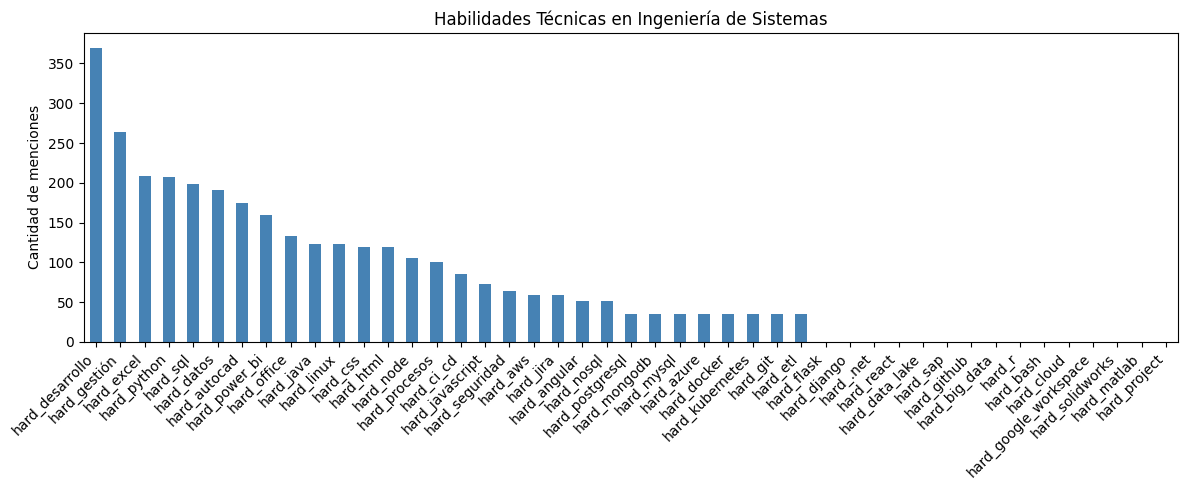

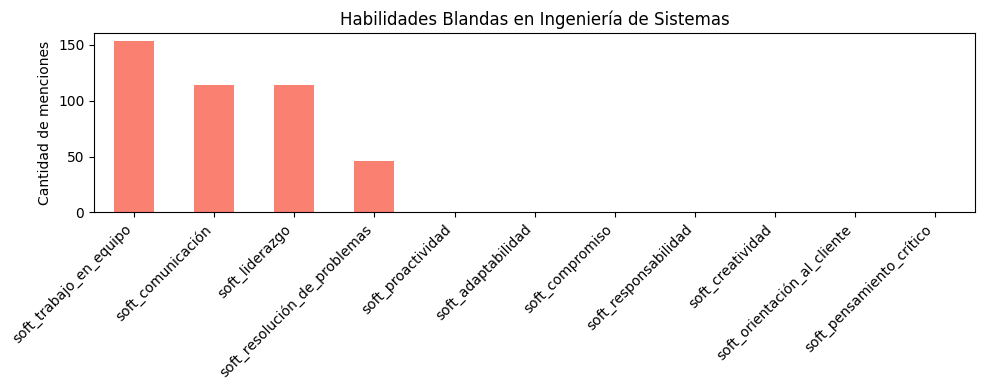

In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo las filas de Ingeniería de Sistemas
df_sistemas = df[df['Carrera Detectada'] == 'Ingeniería de Sistemas']

# Contar menciones por columna de habilidades
conteo_hard = df_sistemas[[col for col in df_sistemas.columns if col.startswith('hard_')]].sum().sort_values(ascending=False)
conteo_soft = df_sistemas[[col for col in df_sistemas.columns if col.startswith('soft_')]].sum().sort_values(ascending=False)

# Gráfico de habilidades técnicas
plt.figure(figsize=(12, 5))
conteo_hard.plot(kind='bar', color='steelblue')
plt.title('Habilidades Técnicas en Ingeniería de Sistemas')
plt.ylabel('Cantidad de menciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de habilidades blandas
plt.figure(figsize=(10, 4))
conteo_soft.plot(kind='bar', color='salmon')
plt.title('Habilidades Blandas en Ingeniería de Sistemas')
plt.ylabel('Cantidad de menciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

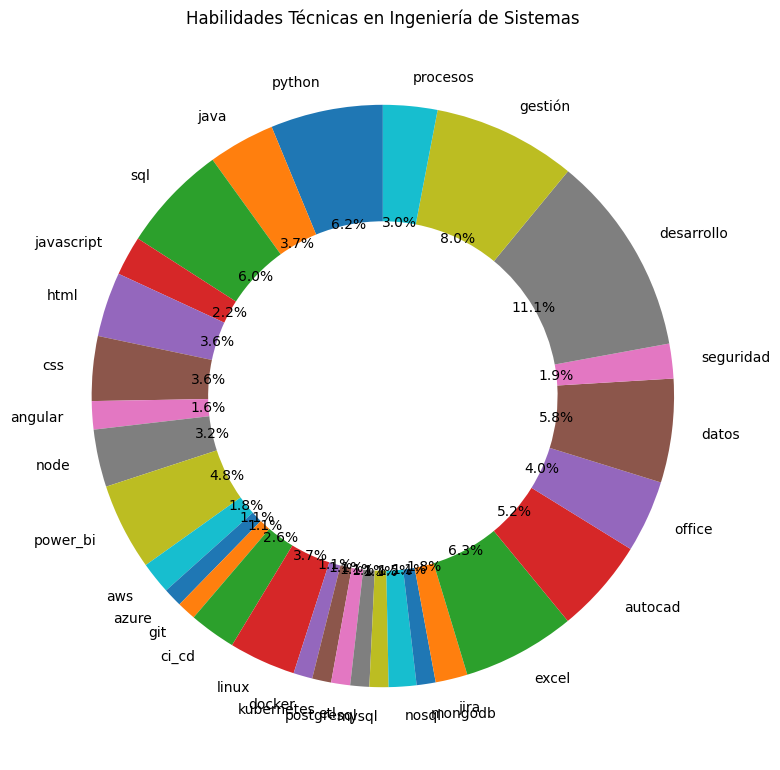

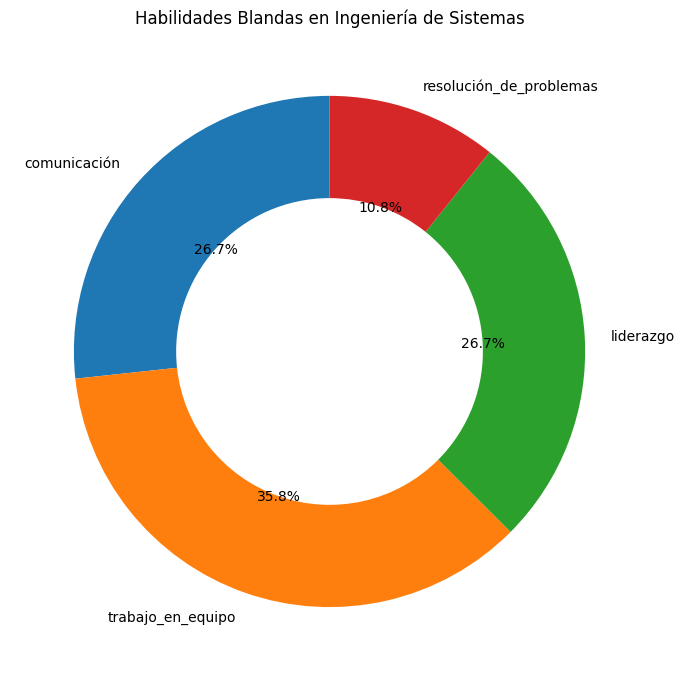

In [ ]:
import matplotlib.pyplot as plt

# Filtrar Ingeniería de Sistemas
df_sistemas = df[df['Carrera Detectada'] == 'Ingeniería de Sistemas']

# Contar menciones
conteo_hard = df_sistemas[[col for col in df_sistemas.columns if col.startswith('hard_')]].sum()
conteo_soft = df_sistemas[[col for col in df_sistemas.columns if col.startswith('soft_')]].sum()

# Eliminar habilidades no mencionadas
conteo_hard = conteo_hard[conteo_hard > 0]
conteo_soft = conteo_soft[conteo_soft > 0]

# Gráfico de dona para hard skills
plt.figure(figsize=(8, 8))
plt.pie(conteo_hard, labels=[label.replace("hard_", "") for label in conteo_hard.index],
        autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Habilidades Técnicas en Ingeniería de Sistemas')
plt.tight_layout()
plt.show()

# Gráfico de dona para soft skills
plt.figure(figsize=(7, 7))
plt.pie(conteo_soft, labels=[label.replace("soft_", "") for label in conteo_soft.index],
        autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title('Habilidades Blandas en Ingeniería de Sistemas')
plt.tight_layout()
plt.show()

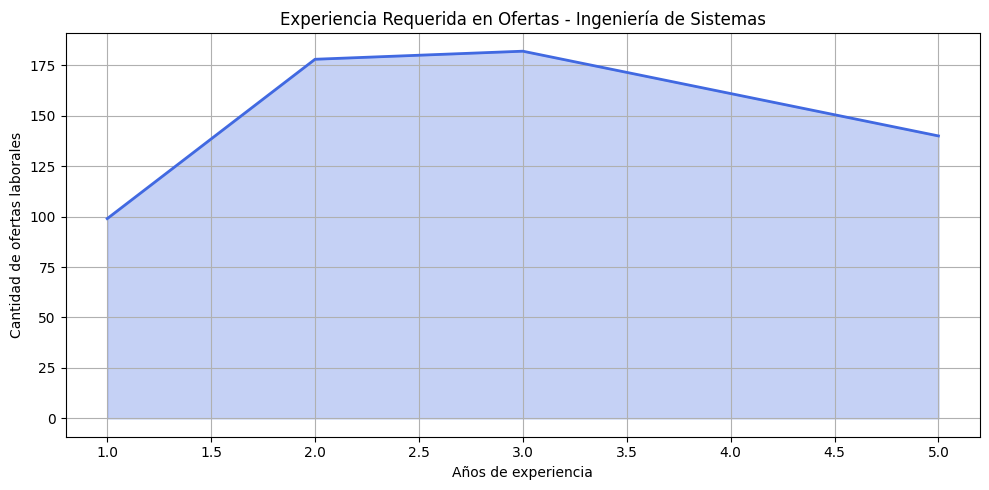

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Preparar texto
df['Requerimientos'] = df['Requerimientos'].astype(str).str.lower()
df['Carrera Detectada'] = df['Carrera Detectada'].astype(str)

# Filtrar por Ingeniería de Sistemas
df_sistemas = df[df['Carrera Detectada'].str.lower() == 'ingeniería de sistemas'].copy()

# Función para extraer años de experiencia desde 'Requirements'
def extraer_experiencia_req(req):
    match = re.search(r'(\d+)\s*(años|año)', req)
    if match:
        anios = int(match.group(1))
        return anios if 0 <= anios <= 10 else None  # solo valores entre 0 y 10
    return None

# Aplicar función
df_sistemas['Experiencia_Anios'] = df_sistemas['Requerimientos'].apply(extraer_experiencia_req)

# Contar valores válidos
conteo_exp = df_sistemas['Experiencia_Anios'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(conteo_exp.index, conteo_exp.values, color='royalblue', linewidth=2)
plt.fill_between(conteo_exp.index, conteo_exp.values, alpha=0.3, color='royalblue')
plt.title("Experiencia Requerida en Ofertas - Ingeniería de Sistemas")
plt.xlabel("Años de experiencia")
plt.ylabel("Cantidad de ofertas laborales")
plt.grid(True)
plt.tight_layout()
plt.show()

**TA-003 – Caracteres Especiales Removidos**

In [ ]:
columnas_texto = df.select_dtypes(include='object').columns

#Función para limpiar y contar caracteres eliminados
import re

def limpiar_y_contar(texto):
    if not isinstance(texto, str):
        return texto, 0
    original = texto
    # Eliminar caracteres especiales y saltos de línea
    limpio = re.sub(r'[^\w\s.,:/()-]', '', original)
    eliminado = len(original) - len(limpio)
    return limpio, eliminado

#Aplicar limpieza y calcular cantidad removida por campo
reporte_remocion = {}

for col in columnas_texto:
    limpio, cantidad = zip(*df[col].apply(limpiar_y_contar))
    df[col] = limpio  # Actualizar la columna con texto limpio
    reporte_remocion[col] = sum(cantidad)  # Total caracteres eliminados por columna

print("🧹 Caracteres eliminados por columna textual:")
for col, total in reporte_remocion.items():
    print(f"- {col}: {total} caracteres eliminados")


🧹 Caracteres eliminados por columna textual:
- Título: 47 caracteres eliminados
- Subtítulo: 0 caracteres eliminados
- Calificación: 0 caracteres eliminados
- Empresa: 74 caracteres eliminados
- URL_Empresa: 0 caracteres eliminados
- Región: 0 caracteres eliminados
- Contrato: 0 caracteres eliminados
- Jornada: 0 caracteres eliminados
- Tipo_Asistencia: 0 caracteres eliminados
- Descripción: 4740 caracteres eliminados
- Requerimientos: 73 caracteres eliminados
- Acerca_de_Empresa: 93 caracteres eliminados
- Descripcion: 4740 caracteres eliminados
- texto_skills: 4813 caracteres eliminados
- Carrera Detectada: 0 caracteres eliminados


**TA-007 – Medir Normalización de Datos**

In [ ]:
# Verificar si la columna Salario está dentro del rango [0, 1]
min_salario = df['Salario'].min()
max_salario = df['Salario'].max()

if min_salario >= 0 and max_salario <= 1:
    print("✅ La columna 'Salario' está correctamente normalizada en el rango [0, 1].")
else:
    print("La columna 'Salario' NO está normalizada. Rango encontrado:")
    print(f" - Mínimo: {min_salario}")
    print(f" - Máximo: {max_salario}")

✅ La columna 'Salario' está correctamente normalizada en el rango [0, 1].


**Cambio nulos a Texto apropiado**

In [ ]:
# Rellenar valores nulos con texto apropiado según el contexto
df['Subtítulo'] = df['Subtítulo'].fillna('No especificado')
df['Calificación'] = df['Calificación'].fillna('Sin calificar')
df['Empresa'] = df['Empresa'].fillna('No especificado')
df['Salario'] = df['Salario'].fillna('No especificado')
df['Tipo_Asistencia'] = df['Tipo_Asistencia'].fillna('No especificado')
df['Acerca_de_Empresa'] = df['Acerca_de_Empresa'].fillna('No especificado')

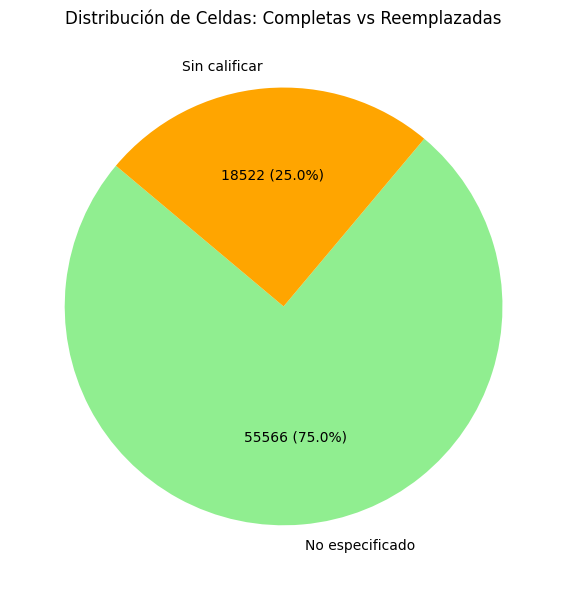

In [ ]:
# Calcular total de celdas
total_celdas = df.shape[0] * df.shape[1]

# Contar celdas "No especificado"
conteo_no_especificado = (
    (df['Subtítulo'] == 'No especificado').sum() +
    (df['Empresa'] == 'No especificado').sum() +
    (df['Salario'] == 'No especificado').sum() +
    (df['Tipo_Asistencia'] == 'No especificado').sum() +
    (df['Acerca_de_Empresa'] == 'No especificado').sum()
)

# Contar celdas "Sin calificar"
conteo_sin_calificar = (df['Calificación'] == 'Sin calificar').sum()

# Crear diccionario con los valores exactos
conteos = {
    'No especificado': conteo_no_especificado,
    'Sin calificar': conteo_sin_calificar
}

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
pd.Series(conteos).plot(
    kind='pie',
    autopct=lambda p: f'{int(p * total_celdas / 100)} ({p:.1f}%)',
    startangle=140,
    colors=['lightgreen', 'orange', 'lightblue']
)
plt.title('Distribución de Celdas: Completas vs Reemplazadas')
plt.ylabel('')
plt.tight_layout()
plt.show()


**TA-006 – Contar Registros Imputados**

In [ ]:
# Contar imputaciones de texto estándar (hechas previamente)
conteo_imputaciones = {
    'Subtítulo (No especificado)': (df['Subtítulo'] == 'No especificado').sum(),
    'Empresa (No especificado)': (df['Empresa'] == 'No especificado').sum(),
    'Salario (No especificado)': (df['Salario'] == 'No especificado').sum(),
    'Tipo_Asistencia (No especificado)': (df['Tipo_Asistencia'] == 'No especificado').sum(),
    'Acerca_de_Empresa (No especificado)': (df['Acerca_de_Empresa'] == 'No especificado').sum(),
    'Calificación (Sin calificar)': (df['Calificación'] == 'Sin calificar').sum()
}

# Mostrar resultados
print("Registros imputados por tipo:")
for campo, cantidad in conteo_imputaciones.items():
    print(f"- {campo}: {cantidad} registros imputados")

Registros imputados por tipo:
- Subtítulo (No especificado): 12 registros imputados
- Empresa (No especificado): 4 registros imputados
- Salario (No especificado): 17 registros imputados
- Tipo_Asistencia (No especificado): 0 registros imputados
- Acerca_de_Empresa (No especificado): 6 registros imputados
- Calificación (Sin calificar): 13 registros imputados


**Cambiar nombres de columnas al inglés (solo los títulos)**

In [ ]:
df.rename(columns={
    'Título': 'Title',
    'Región': 'Region',
    'Salario': 'Salary',
    'Contrato': 'ContractType',
    'Jornada': 'Workday',
    'Tipo_Asistencia': 'AttendanceType',
    'Descripción': 'Description',
    'Requerimientos': 'Requirements'
}, inplace=True)

# **TA-011 – Medir Tiempo de Procesamiento**

In [ ]:
import pandas as pd
import time
import re
from sklearn.preprocessing import MinMaxScaler

# Cargar CSV
df = pd.read_csv('Computrabajo_Metricas.csv')

# Limpiar encabezados: eliminar espacios en blanco
df.columns = df.columns.str.strip()

# Asegurarse de que todos los valores sean strings y limpiar espacios
df = df.astype(str)
for col in df.columns:
    df[col] = df[col].str.strip()

# MÉTRICA 1 – Tiempo de limpieza de caracteres especiales
start = time.time()

def limpiar_caracteres(texto):
    return re.sub(r'[^\w\s.,:/()-]', '', texto) if isinstance(texto, str) else texto

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map(limpiar_caracteres)

end = time.time()
tiempo_limpieza = end - start

# MÉTRICA 2 – Tiempo de parseo de salarios
def parsear_salario(s):
    if isinstance(s, str) and "S/." in s:
        s = s.replace("S/.", "").replace(",", "").split()[0]
        try:
            return float(s)
        except:
            return pd.NA
    return pd.NA

start = time.time()
df['Salario_Parseado'] = df['Salario'].apply(parsear_salario)
end = time.time()
tiempo_parseo = end - start

# MÉTRICA 3 – Tiempo de imputación de salarios
start = time.time()
media_salario = df['Salario_Parseado'].mean()
df['Salario_Imputado'] = df['Salario_Parseado'].fillna(media_salario)
end = time.time()
tiempo_imputacion = end - start

# MÉTRICA 4 – Tiempo de normalización
start = time.time()
scaler = MinMaxScaler()
df['Salario_Normalizado'] = scaler.fit_transform(df[['Salario_Imputado']])
end = time.time()
tiempo_normalizacion = end - start

# Reporte de duración de cada procesamiento
print("Reporte de duración de procesamiento:")
print(f"Limpieza de caracteres: {tiempo_limpieza:.4f} segundos")
print(f"Parseo de salario: {tiempo_parseo:.4f} segundos")
print(f"Imputación de salario: {tiempo_imputacion:.4f} segundos")
print(f"Normalización de salario: {tiempo_normalizacion:.4f} segundos")


Reporte de duración de procesamiento:
Limpieza de caracteres: 0.0592 segundos
Parseo de salario: 0.0017 segundos
Imputación de salario: 0.0014 segundos
Normalización de salario: 0.0041 segundos


<ipython-input-276-7d5134d1c04d>:47: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Salario_Imputado'] = df['Salario_Parseado'].fillna(media_salario)


In [ ]:
# Guardar
df.to_csv("dataset_procesado.csv", index=False)

from google.colab import files
files.download("dataset_procesado.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>